## Heart Disease
Data blev taget fra [Kaggle](https://www.kaggle.com/fedesoriano/heart-failure-prediction).

Nødvendige pakker hentes

In [125]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from Preprocessing import normalize_dataframe

Data loades fra csv fil:

In [126]:
data = pd.read_csv("Data/heart.csv", delimiter=';')

Vi har 918 observationer med 12 variabler. Her er summary af vores data.

In [127]:
print(data.head())
print(data.info())
print(data.describe())

numerical= data.drop(['HeartDisease'], axis=1).select_dtypes('number').columns
categorical = data.select_dtypes('object').columns

print(f'Numerical Columns:  {data[numerical].columns}')
print('\n')
print(f'Categorical Columns: {data[categorical].columns}')
data[categorical].nunique()

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N        0       Up             0  
1              N        1     Flat             1  
2              N        0       Up             0  
3              Y       15     Flat             1  
4              N        0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age      

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

#### Histogram


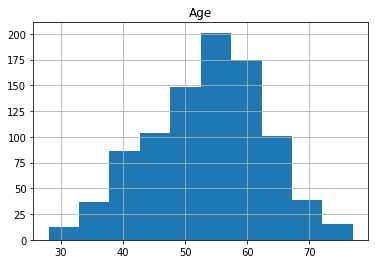

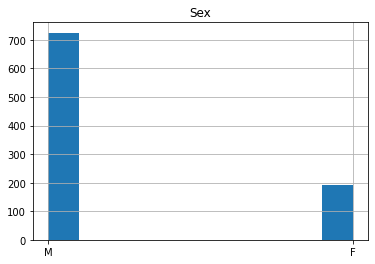

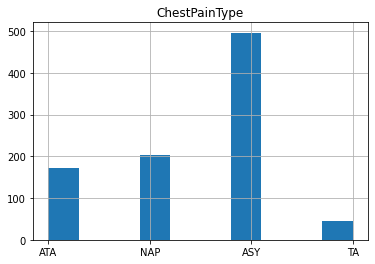

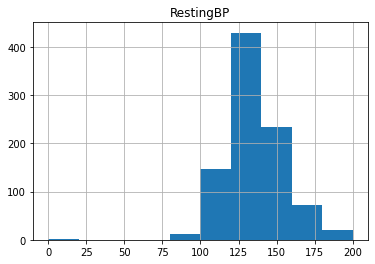

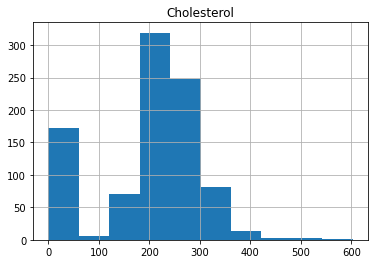

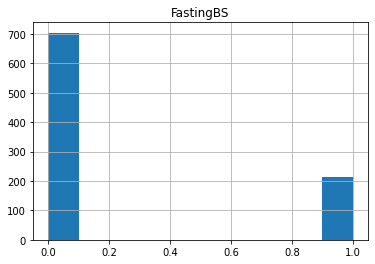

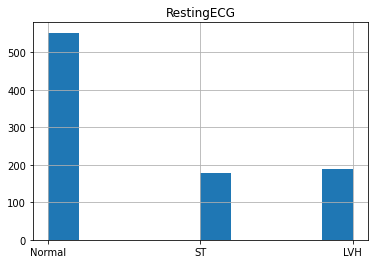

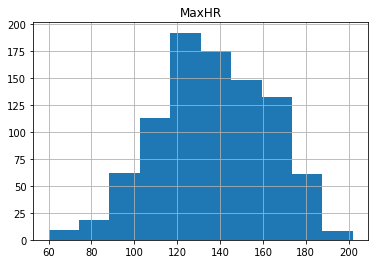

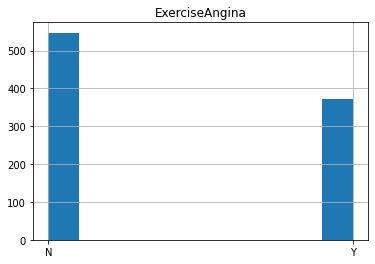

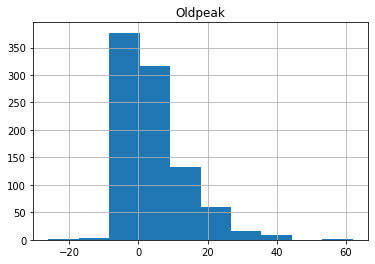

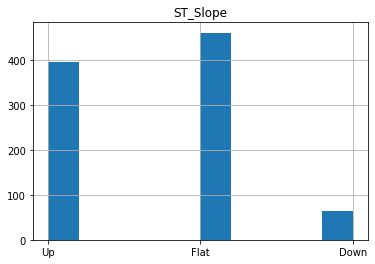

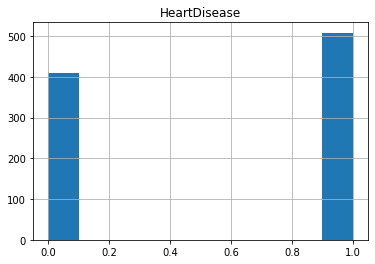

In [132]:
data = pd.read_csv("Data/heart.csv", delimiter=';')
for i in range(0, 12):
    data[data.columns[i]].hist()
    plt.title(data.columns[i])
    plt.savefig(data.columns[i] + ".png" )
    plt.show()

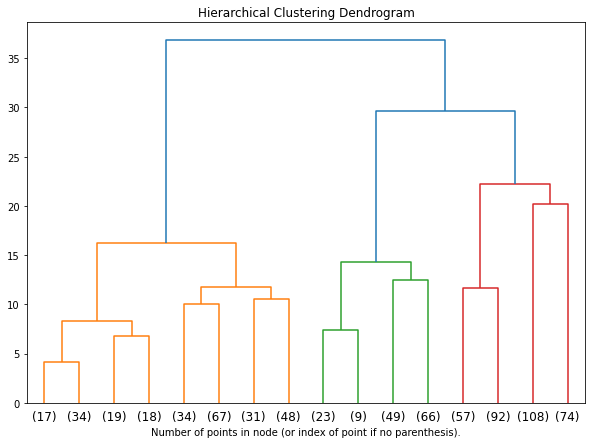

In [129]:
from Preprocessing import normalize_dataframe

dataframe_oneOutOfK = pd.read_csv("Data/feature_transform_outliers_removed.csv", delimiter=",").copy()
normalizeDataFrame = normalize_dataframe(df=dataframe_oneOutOfK).copy()
del normalizeDataFrame["HeartDisease"]
NumericData = normalizeDataFrame.copy().loc[:,'Age':'Oldpeak']
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(affinity='euclidean',linkage='ward',distance_threshold=0, n_clusters=None)
model = model.fit(NumericData)
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.savefig("Hierarchical_Clustering_feature.png" )
plt.show()

In [130]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
output = cluster.fit_predict(NumericData)

In [131]:
data = pd.read_csv("Data/feature_transform_outliers_removed.csv", delimiter=",").copy()

syg_total = 0

for i in range(746):
    if data["HeartDisease"][i] == 1:
        syg_total = syg_total + 1
print(f"Total antal syge: {syg_total}")

klynge1_total = 0
klynge1_syg = 0
klynge2_total = 0
klynge2_syg = 0
for i in range(746):
    if output[i] == 1:
        klynge1_total = klynge1_total + 1
        if data["HeartDisease"][i] == 1:
            klynge1_syg = klynge1_syg + 1
    else:
        klynge2_total = klynge2_total + 1
        if data["HeartDisease"][i] == 1:
            klynge2_syg = klynge2_syg + 1
print(f"total observationer i klynge 1(orange): {klynge1_total}")
print(f"total hjertesyge observationer i klynge 1(orange): {klynge1_syg}")
print(f"total observationer i klynge 2(grøn+rød): {klynge2_total}")
print(f"total hjertesyge observationer i klynge 2(grøn+rød): {klynge2_syg}")

Total antal syge: 356
total observationer i klynge 1(orange): 268
total hjertesyge observationer i klynge 1(orange): 60
total observationer i klynge 2(grøn+rød): 478
total hjertesyge observationer i klynge 2(grøn+rød): 296
